<a href="https://colab.research.google.com/github/ikukang/MLwithPython/blob/master/3_4_2_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 사용 상의 편의를 위한 Initial Setting 

# 실행결과를 한 창에 표시
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# numpy 소숫점 setting
import numpy as np
np.set_printoptions(precision=7)

# pandas이용하여 grid display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)          # 최대 표시 줄 수 제한 해제
pd.set_option('display.max_columns', None)       # 최대 표시 컬럼 수 제한 해제
pd.set_option('display.max_colwidth', -1)        # 컬럼내 데이터 표시 제한 해제

# Warning Message hide
import warnings
warnings.filterwarnings('ignore')

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
print(cancer.data.shape)
print('\n')
print(cancer.feature_names)
print('\n')
print(cancer.data)
print('\n')
print(cancer.target)

(569, 30)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


[0 0 0 0 0 0 0 0 0 0 

In [0]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(16, activation='tanh', input_shape=(30,)))
network.add(layers.Dense(16, activation='tanh'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
x_val = cancer.data[:150]
x_train = cancer.data[150:400]

y_val = cancer.target[:150]
y_train = cancer.target[150:400]

x_test = cancer.data[400:]
y_test = cancer.target[400:]

In [0]:
history = network.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))




Train on 250 samples, validate on 150 samples
Epoch 1/40





250/250 [==============================] - 10s 39ms/step - loss: 0.6745 - acc: 0.4760 - val_loss: 0.6941 - val_acc: 0.4533
Epoch 2/40
250/250 [==============================] - 0s 73us/step - loss: 0.5961 - acc: 0.6440 - val_loss: 0.6668 - val_acc: 0.4533
Epoch 3/40
250/250 [==============================] - 0s 68us/step - loss: 0.5567 - acc: 0.6440 - val_loss: 0.6608 - val_acc: 0.4533
Epoch 4/40
250/250 [==============================] - 0s 71us/step - loss: 0.5374 - acc: 0.6640 - val_loss: 0.6465 - val_acc: 0.4867
Epoch 5/40
250/250 [==============================] - 0s 67us/step - loss: 0.5179 - acc: 0.6760 - val_loss: 0.6175 - val_acc: 0.7800
Epoch 6/40
250/250 [==============================] - 0s 77us/step - loss: 0.5026 - acc: 0.8840 - val_loss: 0.6225 - val_acc: 0.7667
Epoch 7/40
250/250 [==============================] - 0s 67us/step - loss: 0.4823 - acc: 0.8760 - val_loss: 0.5982 - val_acc: 0.7933
Epoch 8/40
250

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
print(history_dict['loss'])
print(history_dict['acc'])

[0.6744722967147827, 0.5960864238739013, 0.5566654019355773, 0.5374326195716858, 0.5179490628242492, 0.5025709261894226, 0.48230838537216186, 0.46295636653900146, 0.4485661563873291, 0.4294009704589844, 0.40951649951934815, 0.38691110038757326, 0.3596541748046875, 0.34757518315315244, 0.34176325392723084, 0.3160318238735199, 0.30064061307907103, 0.29534767413139346, 0.31887867784500123, 0.27896801686286926, 0.27709026193618774, 0.27580310130119323, 0.2716516206264496, 0.2575538012981415, 0.2468332040309906, 0.24679458010196687, 0.24468367516994477, 0.24303109395503997, 0.24056045448780058, 0.23399178469181062, 0.22841708314418793, 0.22577036786079407, 0.22237629294395447, 0.23743288373947144, 0.23713455700874328, 0.2105846734046936, 0.21404342794418335, 0.2159106172323227, 0.2055879989862442, 0.21114053642749786]
[0.47600000429153444, 0.644000002861023, 0.6439999942779541, 0.663999993801117, 0.6760000038146973, 0.8840000057220458, 0.8760000052452087, 0.8960000052452087, 0.8880000014305

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

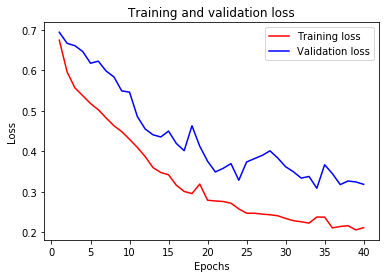

In [0]:
# Training & Validation Loss Graph
import matplotlib.pyplot as plt

plt.clf()   # 그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

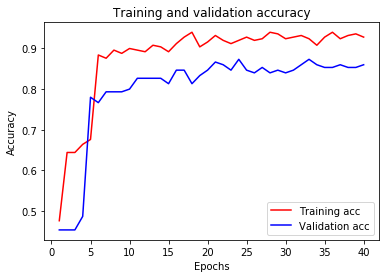

In [0]:
# Training & Validation Accuracy Graph
plt.clf()   # 그래프 초기화

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
# 7 epoch 정도 부터 Accuracy가 85~90% 사이에서 진동 함 , 앞에서와 동일하게 처음부터 다시 Network를 구성
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(30,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])

# fit method로 Training 시, epoch = 20로 Setting
model.fit(x_train, y_train, epochs=20, batch_size=64)

# evaluate method를 이용하여 입력 test data에 대한 loss, accuracy를 계산
loss, accuracy = model.evaluate(x_test, y_test)

Epoch 1/20
250/250 [==============================] - 0s 637us/step - loss: 0.8090 - acc: 0.4960
Epoch 2/20
250/250 [==============================] - 0s 73us/step - loss: 0.6275 - acc: 0.6040
Epoch 3/20
250/250 [==============================] - 0s 55us/step - loss: 0.5954 - acc: 0.6200
Epoch 4/20
250/250 [==============================] - 0s 65us/step - loss: 0.5813 - acc: 0.6200
Epoch 5/20
250/250 [==============================] - 0s 53us/step - loss: 0.5426 - acc: 0.6200
Epoch 6/20
250/250 [==============================] - 0s 53us/step - loss: 0.5445 - acc: 0.7560
Epoch 7/20
250/250 [==============================] - 0s 59us/step - loss: 0.5110 - acc: 0.8840
Epoch 8/20
250/250 [==============================] - 0s 58us/step - loss: 0.4973 - acc: 0.8800
Epoch 9/20
250/250 [==============================] - 0s 59us/step - loss: 0.4994 - acc: 0.8520
Epoch 10/20
250/250 [==============================] - 0s 63us/step - loss: 0.4749 - acc: 0.8840
Epoch 11/20
250/250 [=================

169/169 [==============================] - 0s 246us/step


In [0]:
print('test_acc : ', accuracy)
print('test_loss : ', loss)

test_acc :  0.9230769234296132
test_loss :  0.363441382815852


## 추가 확인 사항
(1) activation function으로 relu를 사용하는 경우, 결과가 일관되게 나오지 않음

(2) activation function 또는 임의 초기값 설정의 문제로 생각되나 정확한 원인 확인 要

(3) activation function을 tanh 로 변경한 후, 해당 문제는 해결된 것으로 보이나, 이 역시 면밀한 재 확인 要